In [1]:
import numpy as np
from scipy import optimize
import json
import pandas as pd
from types import SimpleNamespace
from math import sin, cos

In [1]:
from projimdem import resection as rs
from projimdem import ProjectImageOnDEM as pi

cam_file = 'CuczaDemoData/CamCucza.json'
GCP_file = 'CuczaDemoData/GCPs_Centered.csv'

dem_file = 'CuczaDemoData/DEM.tif'
viewshed_file = 'CuczaDemoData/Viewshed.tif'
image_file = 'CuczaDemoData/Abbey-IMG_0209.jpg'
output_file = 'CuczaDemoData/proj_img_foc_free.tif'

test = rs.resection(cam_file, GCP_file, x_offset=0, y_offset=0, z_offset=0, 
                    free_param=['omega', 'phi', 'kappa'], 
                    param_bounds=([-3.15, -3.15, -3.15], [3.15,3.15,3.15]))
            
test.estimate_cam()
test.print_residuals()

# test_proj = pi.ProjIm2dem(dem_file=dem_file,
#                           viewshed_file=viewshed_file,
#                           image_file=image_file,
#                           cam_param=test.estimate.new_cam,
#                            output_file=output_file
#                           )
# test_proj.ProjectImage2DEM(return_raster=True, epsg=32632)



/home/arcticsnow/miniconda3/envs/dataAna/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 1.1768e+02, final cost 2.3118e+01, first-order optimality 4.15e-01.
RMSE initial =  140.42737032432868
RMSE lstsq =  5.091417970640866
                       name  residual_x_ini  residual_y_ini  residual_x_lstsq  residual_y_lstsq
0              WestRoofEdge     -112.976560     -100.702685         -0.108305         -0.694853
1                TopParasol     -106.176111     -165.497449         -0.542962         -1.689114
2       NorthWestWallCorner      -93.080947     -126.607949          5.249274         -5.489724
3         SouthEastRoofEdge     -163.152575     -198.164426         -4.464186         -0.477214
4   CloisterArcadeSouthWest     -167.683074     -132.334468          0.471223          1.301865
5   CloisterArcadeSouthEast     -153.540946     -172.986898         -0.709482          0.001065
6   CloisterArcadeNorthWest     -115.869914     -110.854395          8.348392         10.348450
7            Cen

In [21]:
test_proj.viewshed_raster.GetRasterBand(1).ReadAsArray()

(525, 707)

In [20]:
test_proj.Xsize
test_proj.Ysize

686

In [51]:
from projimdem import resection as rs
from projimdem import ProjectImageOnDEM as pi
from matplotlib import pyplot as plt
import numpy as np

cam_file = 'FinseDemoData/CamFinseInit.json'
GCP_file = 'FinseDemoData/GCPs_v3.csv'
image_file = 'FinseDemoData/2019-05-24_12-00_ori.jpg'
finse = rs.resection(cam_file, GCP_file, image_file,delimiter_GCP=',',
                    free_param=['omega', 'phi', 'kappa','Z_ini','Foc'],x_offset=419169.2, y_offset=6718421.3, z_offset=1212, 
                    param_bounds=([-3.15, -3.15, -3.15,-100,1000], [3.15,3.15,3.15,100,2500]))

#finse.GCPs
finse.estimate_cam()
finse.print_residuals()

`ftol` termination condition is satisfied.
Function evaluations 48, initial cost 1.8306e+02, final cost 7.6614e+01, first-order optimality 5.06e-02.
RMSE initial =  1455.7745349870427
RMSE lstsq =  69.70235680203194
    name  residual_x_ini  residual_y_ini  residual_x_lstsq  residual_y_lstsq
0    p17     -865.448543       38.966520        211.114175          0.026894
1   p100     -870.517661     -108.977477         66.565420         -1.065447
2    p16     -889.231421      -69.536115         71.348272         14.418821
3    p13     -953.939679      -95.776402         42.439971         22.771221
4    p12             NaN             NaN               NaN               NaN
5    p11             NaN             NaN               NaN               NaN
6     p9    -1062.049043     -301.164671         -2.623369         -0.043304
7    p14    -1025.067399     -274.407183         -0.131443          2.448623
8     p8    -1218.220140     -469.588784          5.248876        -26.423994
9     p7    -1

In [52]:
finse.proj_GCPs2img()

In [43]:
finse.proj_XYZ2img()

In [55]:
finse2 = rs.resection(cam_file, GCP_file, image_file, delimiter_GCP=',',
                    free_param=['omega', 'phi', 'kappa','X_ini','Y_ini','Z_ini','Foc'], x_offset=419169.2, y_offset=6718421.3, z_offset=1212,
                    param_bounds=([-3.15, -3.15, -3.15,-np.inf,-np.inf,-np.inf,1000], [3.15,3.15,3.15,np.inf,np.inf,np.inf,2000]))

#finse.GCPs
finse2.estimate_cam()
#print(finse.estimate.lstsq_results.x)
#print(finse2.estimate.lstsq_results.x)


/home/arcticsnow/miniconda3/envs/dataAna/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


`ftol` termination condition is satisfied.
Function evaluations 90, initial cost 1.8306e+02, final cost 6.3209e+01, first-order optimality 1.12e-01.
RMSE initial =  1455.7745349870427
RMSE lstsq =  59.01626025615447


[[419175.0560812523, 6718425.932471822, 1216.1052472382776],
 array([[ 0.45959124, -0.10126831,  0.88233815],
        [-0.88802921, -0.06740695,  0.45481912],
        [ 0.01341696, -0.99257294, -0.12090886]]),
 1414.082204648181]

In [56]:
finse2.proj_GCPs2img()

In [4]:
dem_file = 'FinseDemoData/time_lapse_finse_DSM_mid.tif'
viewshed_file = 'FinseDemoData/viewshed_mid.tif'
output_file = 'FinseDemoData/finse_1.tif'

finse_proj = pi.ProjIm2dem(dem_file=dem_file,
                          viewshed_file=viewshed_file,
                          image_file=image_file,
                          cam_param=finse.new_cam.proj_param,
                           output_file=output_file
                          )
finse_proj.ProjectImage2DEM(return_raster=True, epsg=32632)

Ortho computed in 29.1436 seconds
Driver GTiff supports Create() method.
Driver GTiff supports CreateCopy() method.
Ortho computed


0

In [5]:
output_file = 'FinseDemoData/finse_2.tif'

finse_proj2 = pi.ProjIm2dem(dem_file=dem_file,
                          viewshed_file=viewshed_file,
                          image_file=image_file,
                          cam_param=finse2.new_cam.proj_param,
                           output_file=output_file
                          )
finse_proj2.ProjectImage2DEM(return_raster=True, epsg=32632)

Ortho computed in 24.0104 seconds
Driver GTiff supports Create() method.
Driver GTiff supports CreateCopy() method.
Ortho computed


0

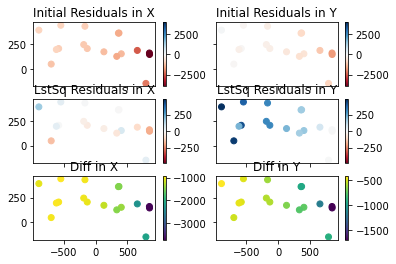

In [7]:
finse.plot_residuals()

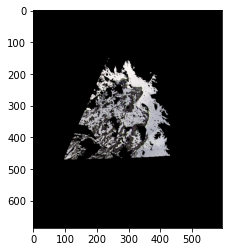

In [4]:
plt.imshow(finse_proj.ortho)

In [60]:
# checGCPsGCPs on image
plt.figure()
plt.imshow(finse_proj.image)
plt.scatter(finse.GCPs.x_img+finse_proj.image.shape[1]/2, finse_proj.image.shape[0] - (finse.GCPs.y_img+finse_proj.image.shape[0]/2))
for i, row in finse.GCPs.iterrows():
    plt.annotate(row['name'], (row.x_img+finse_proj.image.shape[1]/2, finse_proj.image.shape[0] -(row.y_img +finse_proj.image.shape[0]/2) ))

In [34]:
finse.GCPs.x_img
finse_proj.Ysize

686

In [41]:
finse_proj.image.shape

(1020, 1920, 3)

In [5]:
finse.GCPs.loc[finse.GCPs.lstsq_IO.astype(bool)]

,name,x_img,y_img,x_world,y_world,z_world,lstsq_IO,residual_x_lstsq,residual_y_lstsq,residual_x_ini,residual_y_ini
0,P1,848,175,9655.4625,8367.856,1205.08997,1,NaN,NaN,0.000000,0.000000
1,P2,656,216,9762.5746,8440.416,1210.50000,1,0.0,0.0,-2433.759967,-1052.914862
2,P3,846,190,9728.5752,8360.669,1206.71997,1,NaN,NaN,0.000000,0.000000
3,P7,404,182,9328.7125,8469.457,1208.79004,1,NaN,NaN,0.000000,0.000000
4,P8,131,202,9327.5960,8487.768,1210.94995,1,NaN,NaN,0.000000,0.000000
5,P9,-131,235,9344.3437,8534.215,1211.02002,1,NaN,NaN,0.000000,0.000000
6,P12,-697,78,9192.3856,8450.476,1207.92004,1,NaN,NaN,0.000000,0.000000
7,P13,-580,235,9409.8834,8718.999,1212.62000,1,NaN,NaN,0.000000,0.000000
8,P14,-186,275,9597.9050,8720.338,1227.31995,1,NaN,NaN,0.000000,0.000000
9,P16,-616,425,9824.7815,9272.047,1349.29004,1,NaN,NaN,0.000000,0.000000


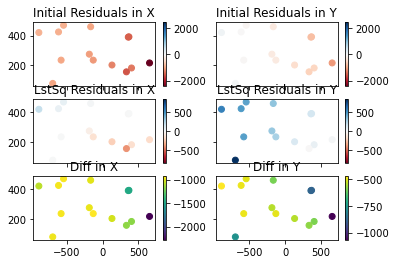

In [2]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(3,2,sharex=True, sharey=True)
sc1 = ax[0,0].scatter(finse.GCPs.x_img, finse.GCPs.y_img, 
                      c=finse.GCPs.residual_x_ini,
                      cmap=plt.cm.RdBu,
                      vmin= -finse.GCPs[['residual_x_ini', 'residual_y_ini']].abs().max().max(),
                      vmax= finse.GCPs[['residual_x_ini', 'residual_y_ini']].abs().max().max())
ax[0,0].set_title('Initial Residuals in X')
plt.colorbar(sc1, ax=ax[0,0])
sc2 = ax[0,1].scatter(finse.GCPs.x_img, finse.GCPs.y_img,
                      c=finse.GCPs.residual_y_ini,
                      cmap=plt.cm.RdBu,
                      vmin= -finse.GCPs[['residual_x_ini', 'residual_y_ini']].abs().max().max(),
                      vmax= finse.GCPs[['residual_x_ini', 'residual_y_ini']].abs().max().max())
ax[0,1].set_title('Initial Residuals in Y')
plt.colorbar(sc2, ax=ax[0,1])
sc3 = ax[1,0].scatter(finse.GCPs.x_img, finse.GCPs.y_img,
                      c=finse.GCPs.residual_x_lstsq,
                      cmap=plt.cm.RdBu,
                      vmin= -finse.GCPs[['residual_x_lstsq', 'residual_y_lstsq']].abs().max().max(),
                      vmax= finse.GCPs[['residual_x_lstsq', 'residual_y_lstsq']].abs().max().max())
ax[1,0].set_title('LstSq Residuals in X')
plt.colorbar(sc3, ax=ax[1,0])
sc4 = ax[1,1].scatter(finse.GCPs.x_img, finse.GCPs.y_img,
                      c=finse.GCPs.residual_y_lstsq,
                      cmap=plt.cm.RdBu,
                      vmin= -finse.GCPs[['residual_x_lstsq', 'residual_y_lstsq']].abs().max().max(),
                      vmax= finse.GCPs[['residual_x_lstsq', 'residual_y_lstsq']].abs().max().max())
ax[1,1].set_title('LstSq Residuals in Y')
plt.colorbar(sc4, ax=ax[1,1])

sc5 = ax[2,0].scatter(finse.GCPs.x_img, 
                      finse.GCPs.y_img, 
                      c=finse.GCPs.residual_x_ini - finse.GCPs.residual_x_lstsq)
ax[2,0].set_title('Diff in X')
plt.colorbar(sc5, ax=ax[2,0])
sc6 = ax[2,1].scatter(finse.GCPs.x_img, 
                      finse.GCPs.y_img, 
                      c=finse.GCPs.residual_y_ini - finse.GCPs.residual_y_lstsq)
ax[2,1].set_title('Diff in Y')
plt.colorbar(sc6, ax=ax[2,1])

In [2]:
finse.GCPs.columns

Index(['name', 'x_img', 'y_img', 'x_world', 'y_world', 'z_world',
       'residual_x_ini', 'residual_y_ini', 'residual_x_lstsq',
       'residual_y_lstsq'],
      dtype='object')